# Studying a new strategy to obtain a filter of superpixels

In [15]:
import cv2
import numpy as np
import sys

sys.path.append("../../DISF/python3/")
sys.path.append("../../iDISF/python3/")
sys.path.append("../../")

In [16]:
from disf import DISF_Superpixels
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import cv2

from ptk_code.utils import *
from ptk_code.TBM_PLOT import batch_PLOT
import joblib
from scripts.utils import *
from scripts.superpixel_treatment import *

In [17]:
INPUT_IMAGE_NAME = '1.png'

In [18]:
img = np.array(Image.open(f"../../data/cells_dataset/original/{INPUT_IMAGE_NAME}"), dtype= 'int32')
gt = np.array(Image.open(f"../../data/cells_dataset/labels/{INPUT_IMAGE_NAME}"), dtype = 'int32')
base_gt_path = '../../data/immuno_cells_2/training/1/'
gt_imgs = [np.array(Image.open(f"{base_gt_path}/{img_file}")) for img_file in os.listdir(base_gt_path)]
num_init_seeds = 7000;
num_final_superpixels = 4000;

In [19]:
def get_segmented_superpixels(original_img, superpixel_label_img, superpixel_ids):
    segmented_superpixels = []
    for id in superpixel_ids:
        cropped_original, cropped_superpixel = get_cropped_original_superpixel_img(original_img, superpixel_label_img,  id)
        segmented_superpixels.append(apply_mask(cropped_original, cropped_superpixel))
    return segmented_superpixels

In [20]:
def filter_superpixels_by_color_mean(ids, superpixels):
    filtered_ids= []
    filtered_superpixels = []
    red_channel_mean_threshold = 130 
    green_channel_mean_threshold = 90 
    blue_channel_mean_threshold = 80 
    for id, superpixel in zip(ids, superpixels):
        red_channel_mean = sum(np.unique(superpixel[:,:,0])) / len(np.unique(superpixel[:,:,0]))
        green_channel_mean = sum(np.unique(superpixel[:,:,1])) / len(np.unique(superpixel[:,:,1]))
        blue_channel_mean = sum(np.unique(superpixel[:,:,2])) / len(np.unique(superpixel[:,:,2]))
        if red_channel_mean < red_channel_mean_threshold and  green_channel_mean < green_channel_mean_threshold and blue_channel_mean < blue_channel_mean_threshold:
            filtered_superpixels.append(superpixel)
            filtered_ids.append(id)
    return filtered_ids, filtered_superpixels

### Analisando as cores médias para imagens 

### Analisando as cores médias para as imagens positivas presentes no ground truth

In [21]:
red_channel_means = []
green_channel_means = []
blue_channel_means =[]
for gt_img in gt_imgs:
    red_channel_mean = sum(np.unique(gt_img[:,:,0])) / len(np.unique(gt_img[:,:,0]))
    green_channel_mean = sum(np.unique(gt_img[:,:,1])) / len(np.unique(gt_img[:,:,1]))
    blue_channel_mean = sum(np.unique(gt_img[:,:,2])) / len(np.unique(gt_img[:,:,2]))
    red_channel_means.append(red_channel_mean)
    green_channel_means.append(green_channel_mean)
    blue_channel_means.append(blue_channel_mean)

Obtendo o maior valor, o menor valor e a média de valores para o canal vermelho

In [22]:
max(red_channel_means), min(red_channel_means), sum(red_channel_means)/len(red_channel_means)

(124.11111111111111, 71.73015873015873, 102.56520577610964)

Obtendo o maior valor, o menor valor e a média de valores para o canal verde

In [23]:
max(green_channel_means), min(green_channel_means), sum(green_channel_means)/len(green_channel_means)

(79.59183673469387, 27.26923076923077, 56.008504172273916)

Obtendo o maior valor, o menor valor e a média de valores para o canal azul

In [24]:
max(blue_channel_means), min(blue_channel_means), sum(blue_channel_means)/len(blue_channel_means)

(61.720338983050844, 14.26923076923077, 36.993280316032)

### Aplicando o Filtro para a imagem 1
---

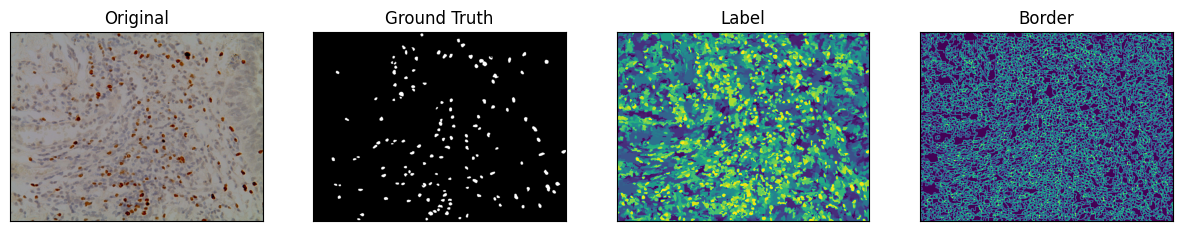

In [25]:
superpixel_label_img, border_img = DISF_Superpixels(img, num_init_seeds, num_final_superpixels)
visualize(original = img, ground_truth = gt,  label = superpixel_label_img, border = border_img)

In [26]:
# Obtaining the superpixel ids and the segmented images
superpixel_ids = np.unique(superpixel_label_img)[1:]
segmented_superpixels = get_segmented_superpixels(img,superpixel_label_img, superpixel_ids)

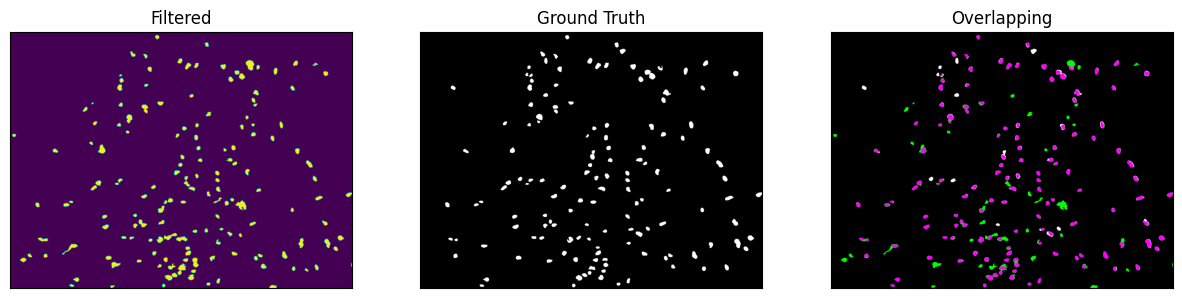

In [27]:
filtered_ids, filtered_superpixels = filter_superpixels_by_color_mean(superpixel_ids,segmented_superpixels)
reconstructed = get_reconstructed_image(superpixel_label_img, filtered_ids)
ovl_img = overlay_comparison(reconstructed, gt)
visualize(filtered = reconstructed,ground_truth = gt, overlapping = ovl_img)

### Aplicando o Filtro para a imagem 2
---

In [28]:
INPUT_IMAGE_NAME = '2.png'
img = np.array(Image.open(f"../../data/cells_dataset/original/{INPUT_IMAGE_NAME}"), dtype= 'int32')
gt = np.array(Image.open(f"../../data/cells_dataset/labels/{INPUT_IMAGE_NAME}"), dtype = 'int32')

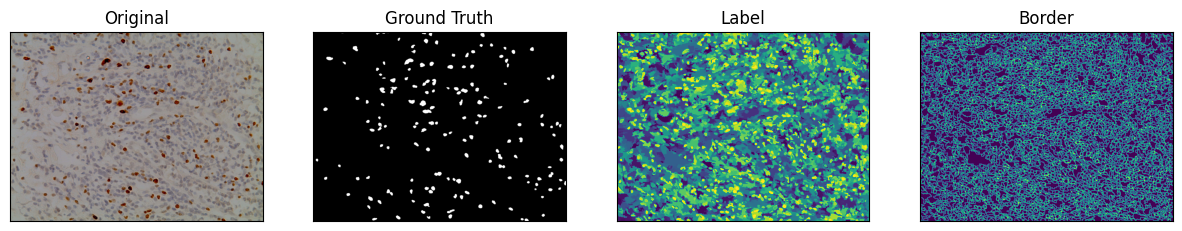

In [29]:
superpixel_label_img, border_img = DISF_Superpixels(img, num_init_seeds, num_final_superpixels)
visualize(original = img, ground_truth = gt,  label = superpixel_label_img, border = border_img)

In [30]:
# Obtaining the superpixel ids and the segmented images
superpixel_ids = np.unique(superpixel_label_img)[1:]
segmented_superpixels = get_segmented_superpixels(img,superpixel_label_img, superpixel_ids)

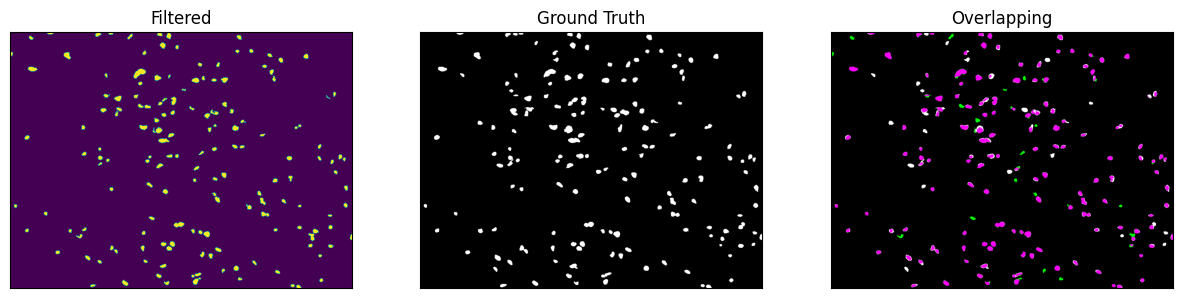

In [31]:
filtered_ids, filtered_superpixels = filter_superpixels_by_color_mean(superpixel_ids,segmented_superpixels)
reconstructed = get_reconstructed_image(superpixel_label_img, filtered_ids)
ovl_img = overlay_comparison(reconstructed, gt)
visualize(filtered = reconstructed,ground_truth = gt, overlapping = ovl_img)

### Aplicando o Filtro para a imagem 3
---

In [32]:
INPUT_IMAGE_NAME = '3.png'
img = np.array(Image.open(f"../../data/cells_dataset/original/{INPUT_IMAGE_NAME}"), dtype= 'int32')
gt = np.array(Image.open(f"../../data/cells_dataset/labels/{INPUT_IMAGE_NAME}"), dtype = 'int32')

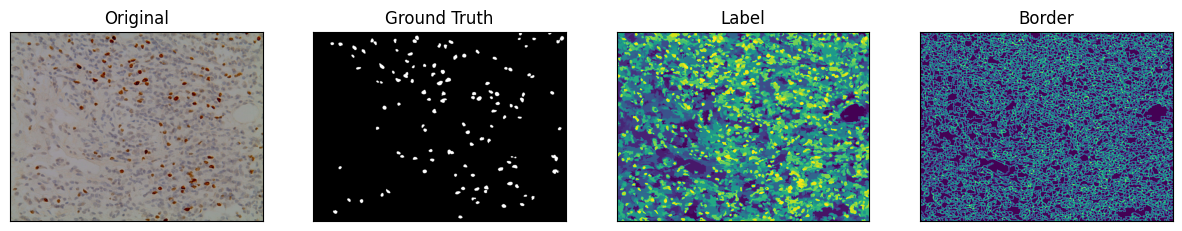

In [33]:
superpixel_label_img, border_img = DISF_Superpixels(img, num_init_seeds, num_final_superpixels)
visualize(original = img, ground_truth = gt,  label = superpixel_label_img, border = border_img)

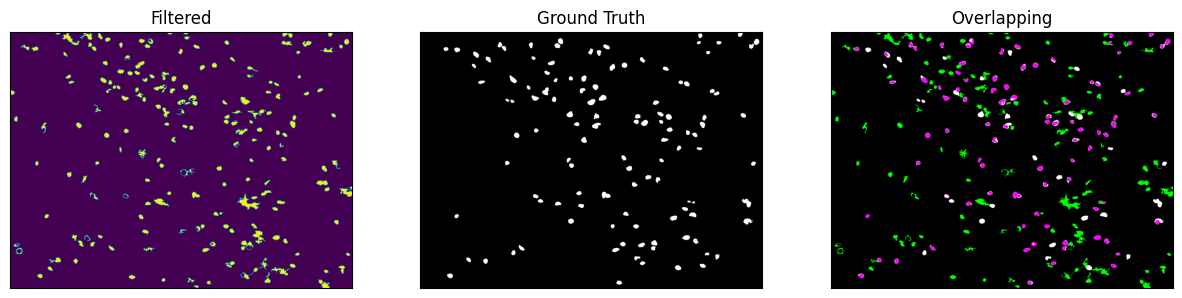

In [34]:
filtered_ids, filtered_superpixels = filter_superpixels_by_color_mean(superpixel_ids,segmented_superpixels)
reconstructed = get_reconstructed_image(superpixel_label_img, filtered_ids)
ovl_img = overlay_comparison(reconstructed, gt)
visualize(filtered = reconstructed,ground_truth = gt, overlapping = ovl_img)

### Aplicando o Filtro para a imagem 4
---

In [35]:
INPUT_IMAGE_NAME = '4.png'
img = np.array(Image.open(f"../../data/cells_dataset/original/{INPUT_IMAGE_NAME}"), dtype= 'int32')
gt = np.array(Image.open(f"../../data/cells_dataset/labels/{INPUT_IMAGE_NAME}"), dtype = 'int32')

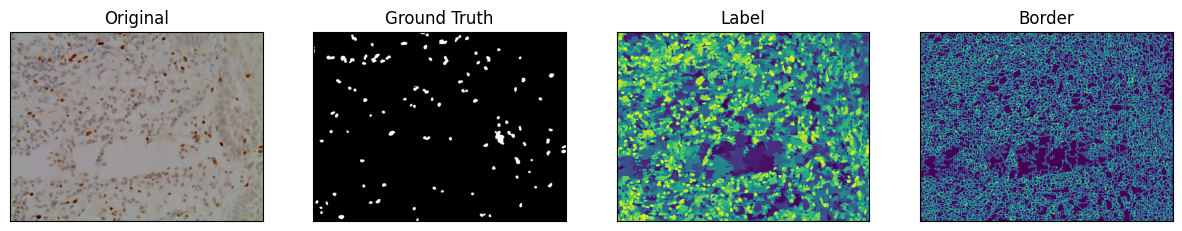

In [36]:
superpixel_label_img, border_img = DISF_Superpixels(img, num_init_seeds, num_final_superpixels)
visualize(original = img, ground_truth = gt,  label = superpixel_label_img, border = border_img)

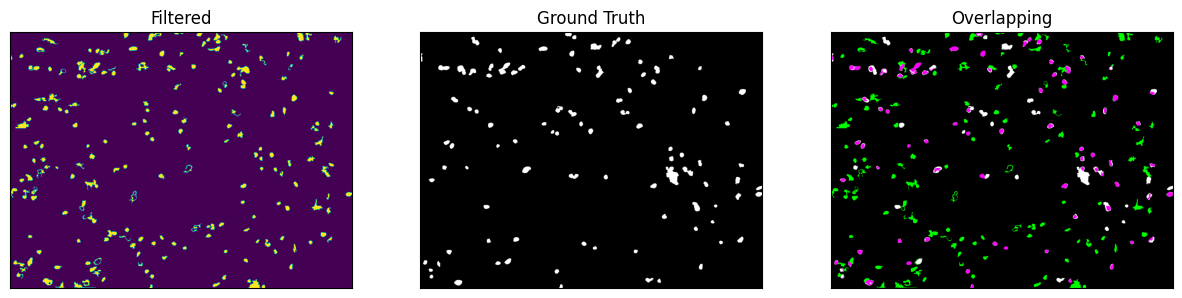

In [37]:
filtered_ids, filtered_superpixels = filter_superpixels_by_color_mean(superpixel_ids,segmented_superpixels)
reconstructed = get_reconstructed_image(superpixel_label_img, filtered_ids)
ovl_img = overlay_comparison(reconstructed, gt)
visualize(filtered = reconstructed,ground_truth = gt, overlapping = ovl_img)

### Aplicando o Filtro para a imagem 5
---

In [38]:
INPUT_IMAGE_NAME = '5.png'
img = np.array(Image.open(f"../../data/cells_dataset/original/{INPUT_IMAGE_NAME}"), dtype= 'int32')
gt = np.array(Image.open(f"../../data/cells_dataset/labels/{INPUT_IMAGE_NAME}"), dtype = 'int32')

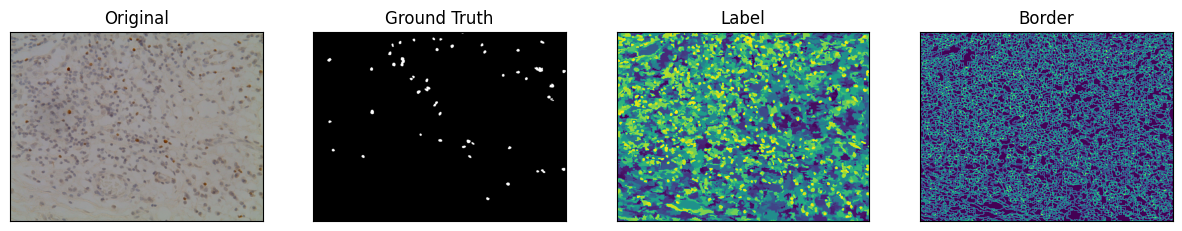

In [39]:
superpixel_label_img, border_img = DISF_Superpixels(img, num_init_seeds, num_final_superpixels)
visualize(original = img, ground_truth = gt,  label = superpixel_label_img, border = border_img)

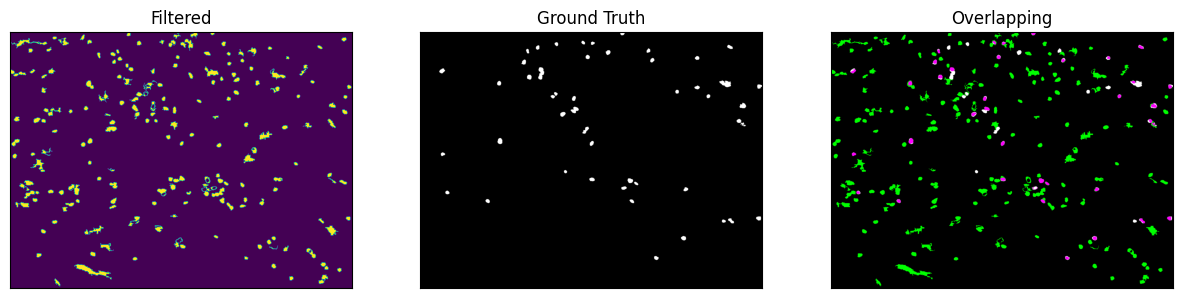

In [40]:
filtered_ids, filtered_superpixels = filter_superpixels_by_color_mean(superpixel_ids,segmented_superpixels)
reconstructed = get_reconstructed_image(superpixel_label_img, filtered_ids)
ovl_img = overlay_comparison(reconstructed, gt)
visualize(filtered = reconstructed,ground_truth = gt, overlapping = ovl_img)

### Aplicando o Filtro para a imagem 6
---

In [41]:
INPUT_IMAGE_NAME = '6.png'
img = np.array(Image.open(f"../../data/cells_dataset/original/{INPUT_IMAGE_NAME}"), dtype= 'int32')
gt = np.array(Image.open(f"../../data/cells_dataset/labels/{INPUT_IMAGE_NAME}"), dtype = 'int32')

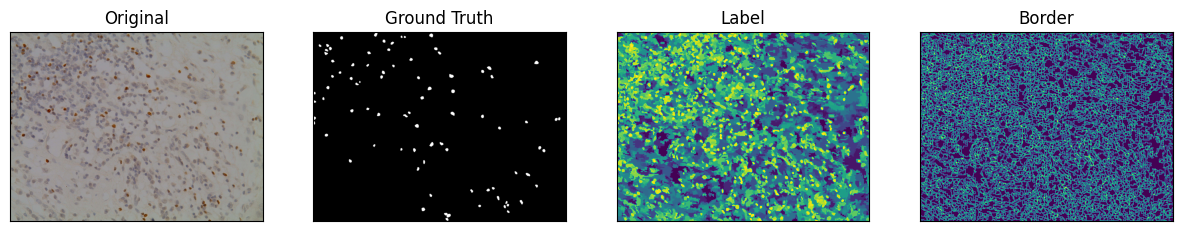

In [42]:
superpixel_label_img, border_img = DISF_Superpixels(img, num_init_seeds, num_final_superpixels)
visualize(original = img, ground_truth = gt,  label = superpixel_label_img, border = border_img)

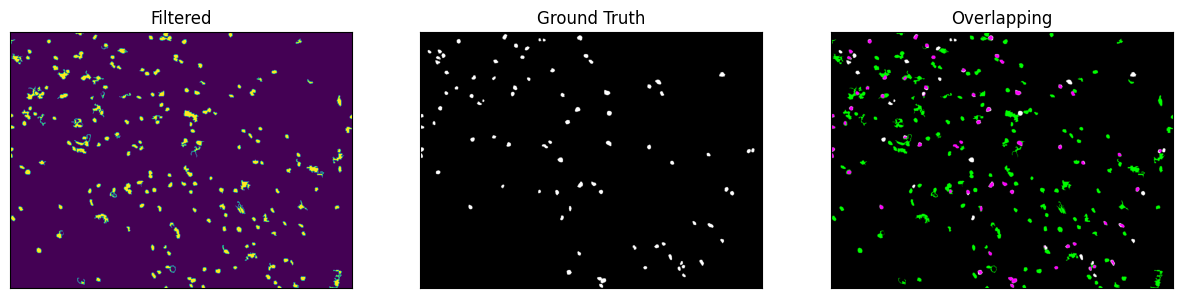

In [43]:
filtered_ids, filtered_superpixels = filter_superpixels_by_color_mean(superpixel_ids,segmented_superpixels)
reconstructed = get_reconstructed_image(superpixel_label_img, filtered_ids)
ovl_img = overlay_comparison(reconstructed, gt)
visualize(filtered = reconstructed,ground_truth = gt, overlapping = ovl_img)

### Aplicando o Filtro para a imagem 7
---

In [44]:
INPUT_IMAGE_NAME = '7.png'
img = np.array(Image.open(f"../../data/cells_dataset/original/{INPUT_IMAGE_NAME}"), dtype= 'int32')
gt = np.array(Image.open(f"../../data/cells_dataset/labels/{INPUT_IMAGE_NAME}"), dtype = 'int32')

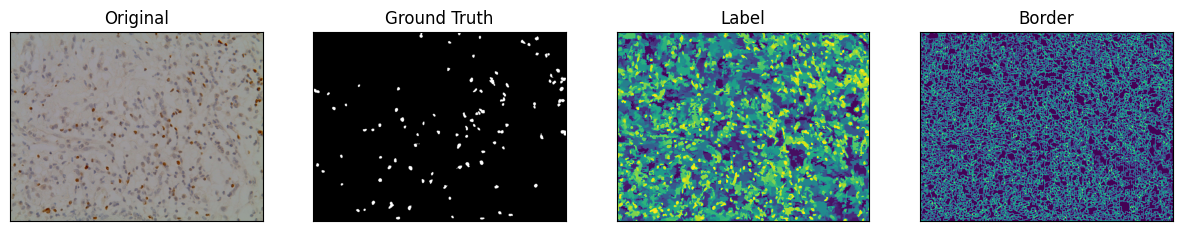

In [45]:
superpixel_label_img, border_img = DISF_Superpixels(img, num_init_seeds, num_final_superpixels)
visualize(original = img, ground_truth = gt,  label = superpixel_label_img, border = border_img)

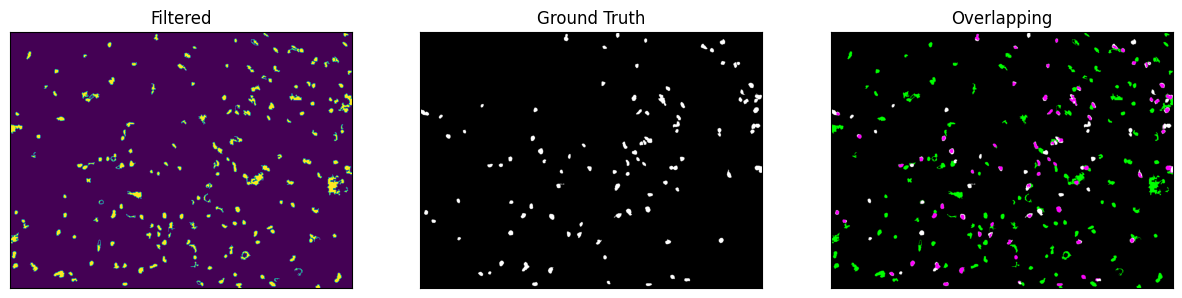

In [46]:
filtered_ids, filtered_superpixels = filter_superpixels_by_color_mean(superpixel_ids,segmented_superpixels)
reconstructed = get_reconstructed_image(superpixel_label_img, filtered_ids)
ovl_img = overlay_comparison(reconstructed, gt)
visualize(filtered = reconstructed,ground_truth = gt, overlapping = ovl_img)

### Aplicando o Filtro para a imagem 8
---

In [47]:
INPUT_IMAGE_NAME = '8.png'
img = np.array(Image.open(f"../../data/cells_dataset/original/{INPUT_IMAGE_NAME}"), dtype= 'int32')
gt = np.array(Image.open(f"../../data/cells_dataset/labels/{INPUT_IMAGE_NAME}"), dtype = 'int32')

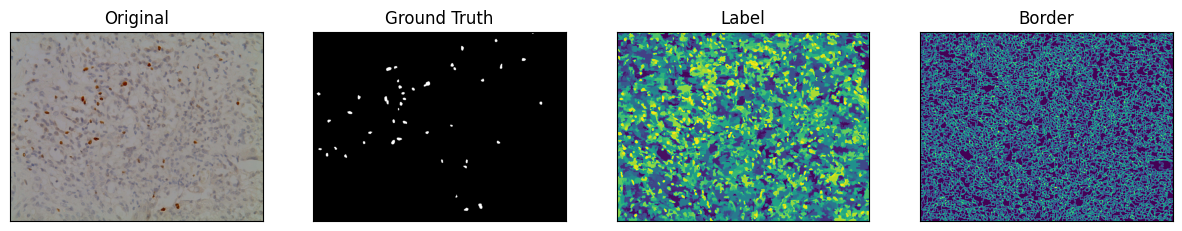

In [48]:
superpixel_label_img, border_img = DISF_Superpixels(img, num_init_seeds, num_final_superpixels)
visualize(original = img, ground_truth = gt,  label = superpixel_label_img, border = border_img)

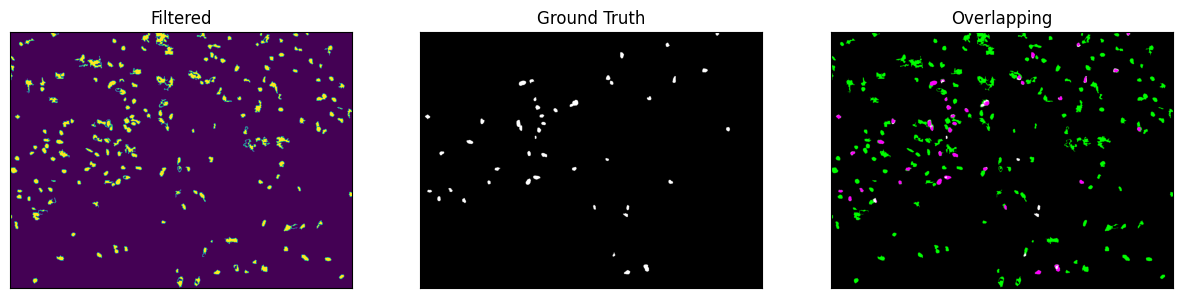

In [49]:
filtered_ids, filtered_superpixels = filter_superpixels_by_color_mean(superpixel_ids,segmented_superpixels)
reconstructed = get_reconstructed_image(superpixel_label_img, filtered_ids)
ovl_img = overlay_comparison(reconstructed, gt)
visualize(filtered = reconstructed,ground_truth = gt, overlapping = ovl_img)

### Aplicando o Filtro para a imagem 9
---

In [50]:
INPUT_IMAGE_NAME = '9.png'
img = np.array(Image.open(f"../../data/cells_dataset/original/{INPUT_IMAGE_NAME}"), dtype= 'int32')
gt = np.array(Image.open(f"../../data/cells_dataset/labels/{INPUT_IMAGE_NAME}"), dtype = 'int32')

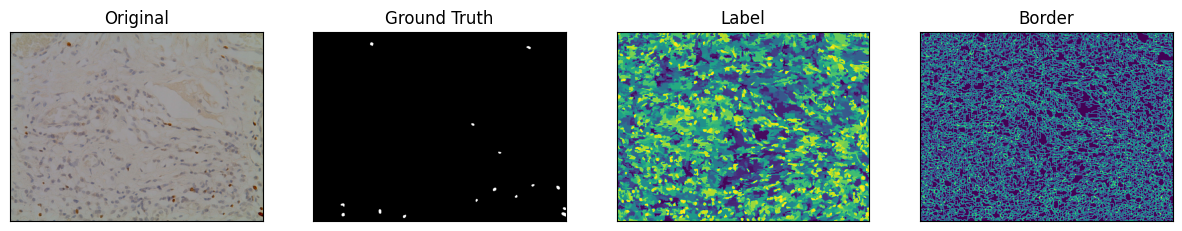

In [51]:
superpixel_label_img, border_img = DISF_Superpixels(img, num_init_seeds, num_final_superpixels)
visualize(original = img, ground_truth = gt,  label = superpixel_label_img, border = border_img)

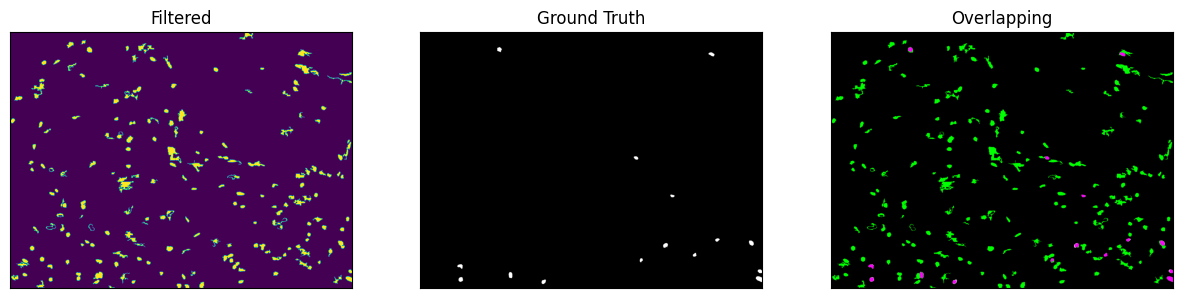

In [52]:
filtered_ids, filtered_superpixels = filter_superpixels_by_color_mean(superpixel_ids,segmented_superpixels)
reconstructed = get_reconstructed_image(superpixel_label_img, filtered_ids)
ovl_img = overlay_comparison(reconstructed, gt)
visualize(filtered = reconstructed,ground_truth = gt, overlapping = ovl_img)

### Aplicando o Filtro para a imagem 10
---

In [53]:
INPUT_IMAGE_NAME = '10.png'
img = np.array(Image.open(f"../../data/cells_dataset/original/{INPUT_IMAGE_NAME}"), dtype= 'int32')
gt = np.array(Image.open(f"../../data/cells_dataset/labels/{INPUT_IMAGE_NAME}"), dtype = 'int32')

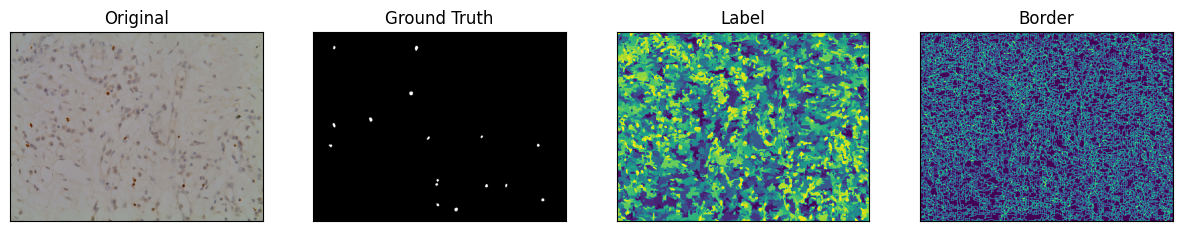

In [54]:
superpixel_label_img, border_img = DISF_Superpixels(img, num_init_seeds, num_final_superpixels)
visualize(original = img, ground_truth = gt,  label = superpixel_label_img, border = border_img)

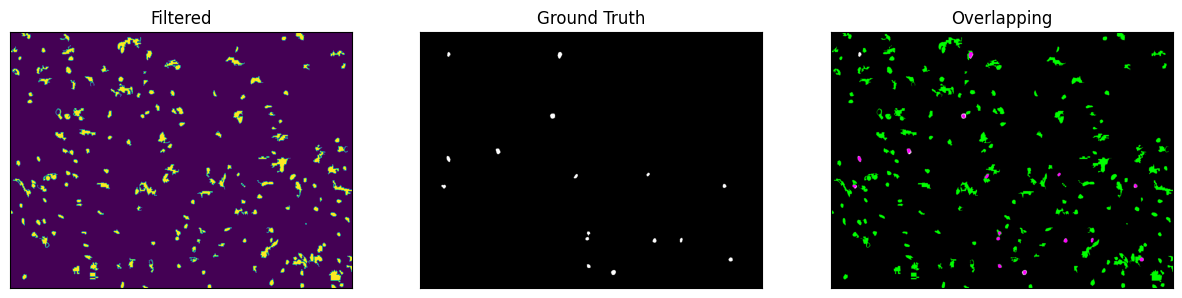

In [55]:
filtered_ids, filtered_superpixels = filter_superpixels_by_color_mean(superpixel_ids,segmented_superpixels)
reconstructed = get_reconstructed_image(superpixel_label_img, filtered_ids)
ovl_img = overlay_comparison(reconstructed, gt)
visualize(filtered = reconstructed,ground_truth = gt, overlapping = ovl_img)